In [2]:
import numpy as np
import bokeh 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="ticks", color_codes = True)
%matplotlib inline

In [3]:
file_encoding = 'utf-8'
injuries_file = 'data/severeinjury.csv'
pd.set_option('display.max_columns',None)

In [4]:
injury_data = pd.read_csv(injuries_file, encoding = 'cp850', dtype = 'unicode')

In [5]:
injury_data.head()

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963,41.46,-74.53,922140,1.00,0.00,1018519,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940,43.59,-89.79,339999,1.00,0.00,1016582,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108,40.49,-80.11,484121,1.00,0.00,NaN,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206,32.77,-83.65,424490,1.00,0.00,1017194,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545,42.67,-89.04,326122,1.00,0.00,1016344,An employee working on the Line 6 Auto-Beller ...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN


In [6]:
monthly_injuries = injury_data[['EventDate','Zip','Latitude','Longitude','Part of Body']]
monthly_injuries.head()

,EventDate,Zip,Latitude,Longitude,Part of Body
0,1/1/2015,10963,41.46,-74.53,513
1,1/1/2015,53940,43.59,-89.79,519
2,1/1/2015,15108,40.49,-80.11,9999
3,1/1/2015,31206,32.77,-83.65,510
4,1/1/2015,53545,42.67,-89.04,4429


In [7]:
print(monthly_injuries.count())
print('\nThere are '+ str(monthly_injuries['EventDate'].count())+ ' Events in the dataset')
print('There are '+ str(monthly_injuries['Zip'].nunique()) + ' Zip Codes in the dataset')

EventDate       39835
Zip             39822
Latitude        39821
Longitude       39821
Part of Body    39835
dtype: int64

There are 39835 Events in the dataset
There are 10372 Zip Codes in the dataset


In [16]:
monthly_injuries['EventDate'] = monthly_injuries['EventDate'].astype('datetime64')

C:\Users\gskotzko\.conda\envs\gtown\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
monthly_injuries.head()

,EventDate,Zip,Latitude,Longitude,Part of Body,Month
0,2015-01-01,10963,41.46,-74.53,513,1
1,2015-01-01,53940,43.59,-89.79,519,1
2,2015-01-01,15108,40.49,-80.11,9999,1
3,2015-01-01,31206,32.77,-83.65,510,1
4,2015-01-01,53545,42.67,-89.04,4429,1


In [18]:
monthly_injuries['Month'] = pd.DatetimeIndex(monthly_injuries['EventDate']).month

C:\Users\gskotzko\.conda\envs\gtown\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
print(monthly_injuries.head())
print(monthly_injuries.tail())

  EventDate    Zip Latitude Longitude Part of Body  Month
0  1/1/2015  10963    41.46    -74.53          513      1
1  1/1/2015  53940    43.59    -89.79          519      1
2  1/1/2015  15108    40.49    -80.11         9999      1
3  1/1/2015  31206    32.77    -83.65          510      1
4  1/1/2015  53545    42.67    -89.04         4429      1
        EventDate    Zip Latitude Longitude Part of Body  Month
39830  10/31/2018  13163    43.08    -75.71         4429     10
39831  10/31/2018  53081    43.72    -87.74          899     10
39832  10/31/2018  10950    41.31    -74.15          512     10
39833  10/31/2018  53209    43.09    -87.92         4422     10
39834  10/31/2018  83287    42.05   -111.40          899     10


C:\Users\gskotzko\.conda\envs\gtown\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gskotzko\.conda\envs\gtown\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


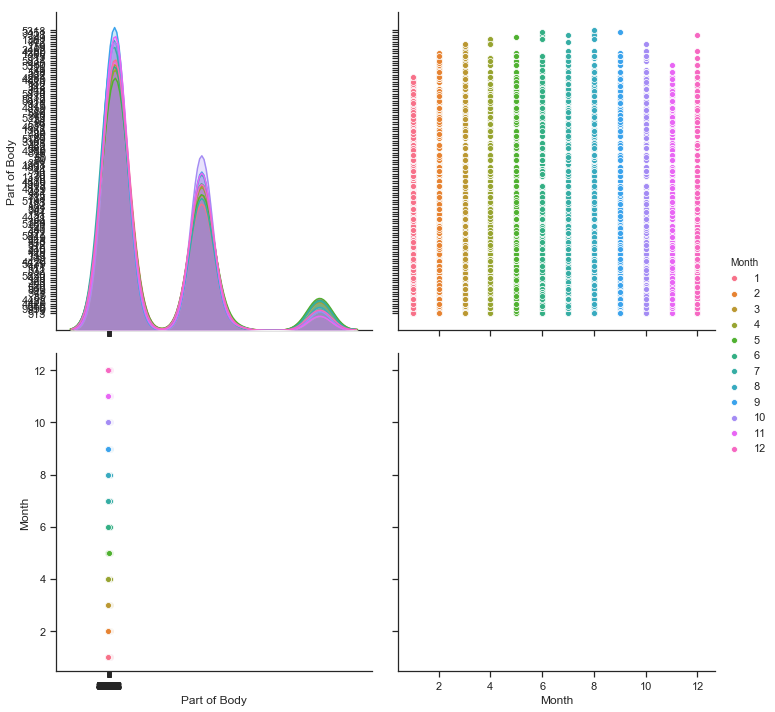

In [14]:
#Just trying to see what's in here. Frequency, etc of injuries by month....over 3 years.
g=sns.pairplot(monthly_injuries, height = 5, hue = 'Month',vars = ['Part of Body','Month'])

In [19]:
#This could be done much more pythonicly with a for loop "for year in years..."
import datetime as dt
injuries_2015=monthly_injuries[monthly_injuries['EventDate'].dt.year==2015]
injuries_2016=monthly_injuries[monthly_injuries['EventDate'].dt.year==2016]
injuries_2017=monthly_injuries[monthly_injuries['EventDate'].dt.year ==2017]
injuries_2018=monthly_injuries[monthly_injuries['EventDate'].dt.year==2018]

In [20]:
injuries_2016.nunique()

EventDate        366
Zip             5448
Latitude        1909
Longitude       2939
Part of Body     103
Month             12
dtype: int64

In [21]:
injuries_2016.head()

,EventDate,Zip,Latitude,Longitude,Part of Body,Month
9856,2016-01-01,81620,39.63,-106.52,511,1
9857,2016-01-01,81501,39.08,-108.58,4422,1
9858,2016-01-01,71854,33.42,-94.00,4422,1
9859,2016-01-01,67003,37.15,-98.03,510,1
9860,2016-01-01,75236,32.67,-96.96,1363,1


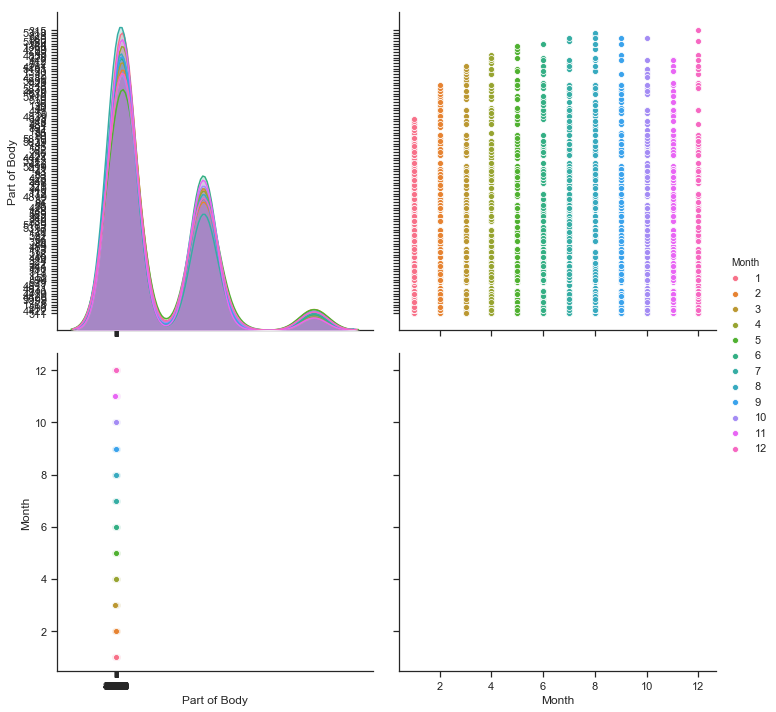

In [22]:
g=sns.pairplot(injuries_2016, height=5, hue='Month', vars=['Part of Body','Month'])

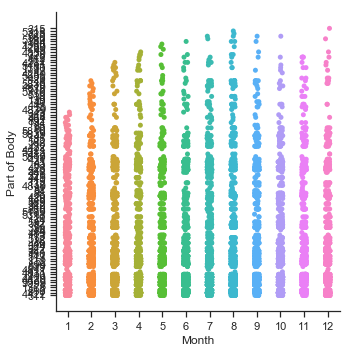

In [23]:
g=sns.catplot(x='Month', y='Part of Body', data=injuries_2016)

Experiment with groupby and sort methods to get data more cleanly sorted and graphed. Then do some statistical counting on injury groups by zipcode.
Read up on pyflakes and pep8 unit testing.

In [32]:
injuries_2016_byzip = injuries_2016.groupby(['Month','Zip','Part of Body'])

In [33]:
injuries_2016_byzip.head()

,EventDate,Zip,Latitude,Longitude,Part of Body,Month
9856,2016-01-01,81620,39.63,-106.52,511,1
9857,2016-01-01,81501,39.08,-108.58,4422,1
9858,2016-01-01,71854,33.42,-94.00,4422,1
9859,2016-01-01,67003,37.15,-98.03,510,1
9860,2016-01-01,75236,32.67,-96.96,1363,1
9861,2016-01-01,43013,40.21,-82.69,6,1
9862,2016-01-01,78541,26.31,-98.17,9999,1
9863,2016-01-01,45213,39.16,-84.43,4420,1
9864,2016-01-01,79546,32.85,-100.46,4429,1
9865,2016-01-01,04037,44.05,-70.91,4422,1


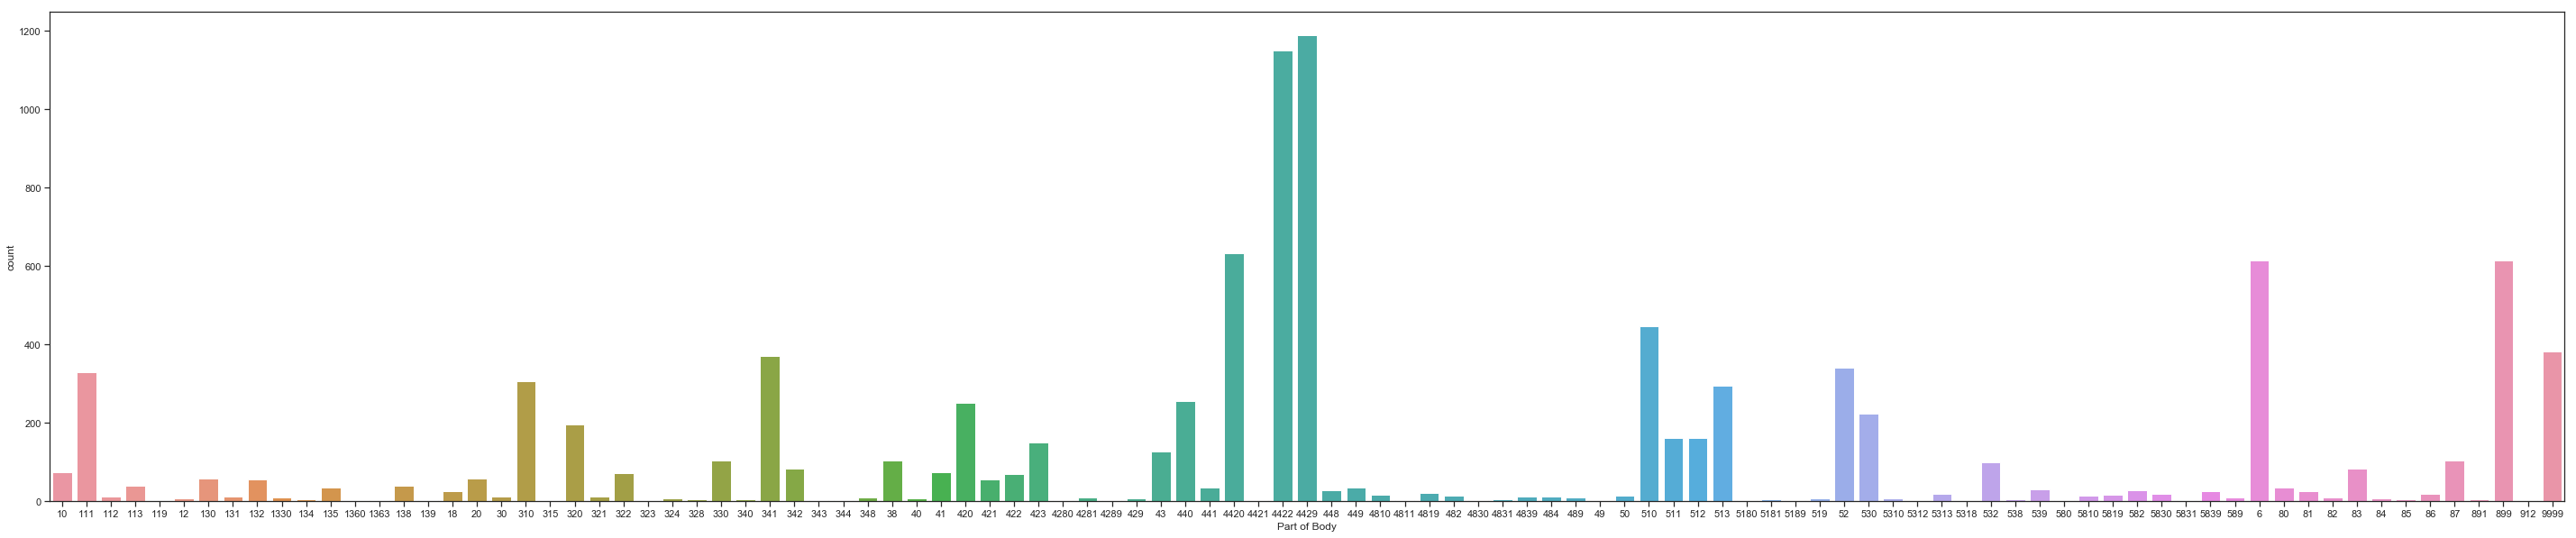

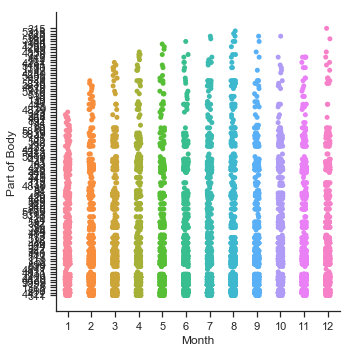

In [50]:
categorical_attributes = injuries_2016.select_dtypes(include="object")
plt.figure(figsize=(50,10))
sns.countplot(data = categorical_attributes, x = "Part of Body")
sns.catplot(x='Month',y="Part of Body",data=injuries_2016)

In [34]:
injuries_2016_byzip_count = injuries_2016.groupby(['Month','Zip'])[['Part of Body']].count()

In [35]:
injuries_2016_byzip_count.head()

Part of Body
Month Zip                
1     00934             1
      01060             1
      01082             1
      01104             1
      01201             1

In [31]:
injuries_2016_byzip.groupby(['Month','Zip']).agg({'injury_count':"count"})

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [37]:
injuries_2016_byzip_count.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9279 entries, (1, 00934) to (12, 99692)
Data columns (total 1 columns):
Part of Body    9279 non-null int64
dtypes: int64(1)
memory usage: 142.4+ KB


In [36]:
sns.catplot(x='Month', y="Part of Body", data = injuries_2016_byzip_count)

ValueError: Could not interpret input 'Month'